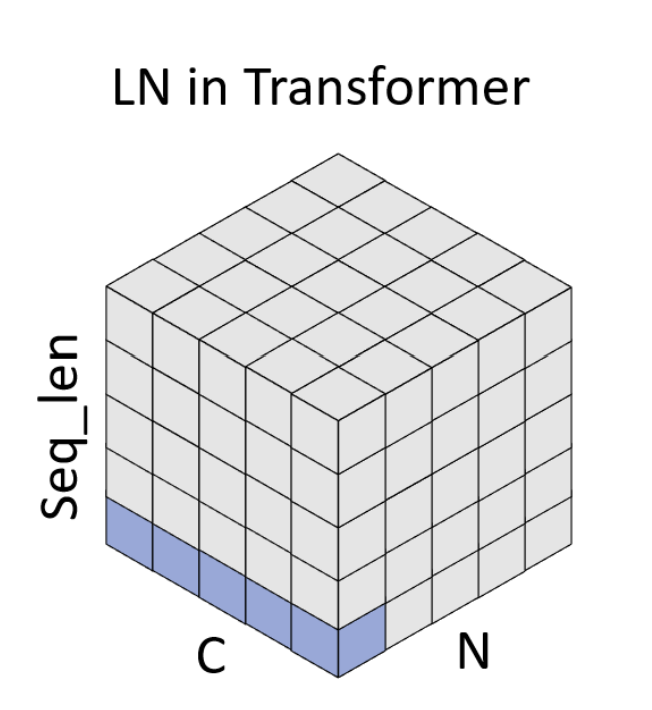

In [ ]:
import torch

# Time length: 2, Feature Dimension: 4
X1 = torch.Tensor([[1, 2, 3, 4],                    # [1, 2, 3, 4]: 4-dimensional vector for t=1
                   [5, 6, 7, 8]]).reshape(1, 2, 4)  # [5, 6, 7, 8]: 4-dimensional vector for t=2

X2 = torch.Tensor([[1, 3, 5, 7],                    # [1, 3, 5, 7]: 4-dimensional vector for t=1
                   [2, 4, 6, 8]]).reshape(1, 2, 4)  # [2, 4, 6, 8]: 4-dimensional vector for t=2

X3 = torch.Tensor([[1, 4, 7, 10],                   # [1, 4, 7, 10]: 4-dimensional vector for t=1
                   [2, 5, 8, 11]]).reshape(1, 2, 4) # [2, 5, 8, 11]: 4-dimensional vector for t=2
batch = torch.cat([X1, X2, X3], dim=0) # 3 x 2 x 4  (B, L, D) sized tensor

print('Original Batch:\n', batch)
print('Batch data shape: ', batch.shape)

layer_norm = torch.nn.LayerNorm(batch.shape[2]) # Normalizing last 4-dimensional vector
layer_norm_result = layer_norm(batch)
print('Batch after layer normalization:\n', layer_norm_result)

Original Batch:
 tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.]],

        [[ 1.,  3.,  5.,  7.],
         [ 2.,  4.,  6.,  8.]],

        [[ 1.,  4.,  7., 10.],
         [ 2.,  5.,  8., 11.]]])
Batch data shape:  torch.Size([3, 2, 4])
Batch after layer normalization:
 tensor([[[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]],

        [[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]],

        [[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416]]],
       grad_fn=<NativeLayerNormBackward0>)


### Check how the layer normalization works

In [ ]:
b_idx = 0
t_idx = 0
l_mu = torch.mean(batch[b_idx, t_idx, :])
l_var = torch.var(batch[b_idx, t_idx, :], unbiased=False)
print('Mean: ', l_mu, ' VAR: ', l_var)
l_res = ((batch[b_idx, t_idx, :] - l_mu) / torch.sqrt(l_var+layer_norm.eps))*layer_norm.weight + layer_norm.bias
print('Original vector: ', batch[b_idx, t_idx, :])
print('PyTorch Normalization: ', layer_norm_result[b_idx, t_idx, :])
print('Manual Normalization: ',l_res)

Mean:  tensor(2.5000)  VAR:  tensor(1.2500)
Original vector:  tensor([1., 2., 3., 4.])
PyTorch Normalization:  tensor([-1.3416, -0.4472,  0.4472,  1.3416], grad_fn=<SliceBackward0>)
Manual Normalization:  tensor([-1.3416, -0.4472,  0.4472,  1.3416], grad_fn=<AddBackward0>)


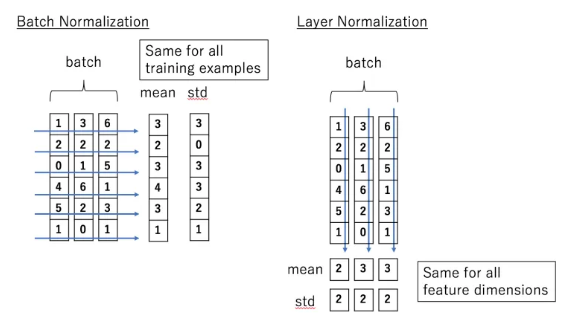